# import packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append("src/")
from src import *

2024-11-24 12:28:59.416797: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 12:29:01.210626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732422541.463988  300907 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732422541.536005  300907 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 12:29:05.224912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
ct = 'LA'

# load data

In [10]:
data = pd.read_parquet("data/preprocessed_data/LA/data.parquet")
prior = pd.read_parquet("data/preprocessed_data/LA/prior.parquet")

data.shape, prior.shape

((274, 10287), (186, 10287))

In [6]:
data

,A0A068F7M9:S367,A0A068F7M9:S512,A0A068F7M9:S524,A0A068F7M9:S549,A0A068F7M9:T716,A0A087WTJ2:S221,A0A087WVQ6:S1020,A0A087WVQ6:S1498,A0A087WVQ6:S580,A0A087WVQ6:T109,...,Q9Y6W5:S90,Q9Y6W5:T129,Q9Y6X8:T37,Q9Y6X9:S615,Q9Y6X9:S743,Q9Y6X9:S779,Q9Y6Y8:S737,Q9Y6Y8:S926,U5Y3L1:S155,X6R2W0:S134
CPT0089340003 Log Ratio_149,1.047565,0.783118,0.649302,0.690661,0.767478,0.762414,0.764757,0.660700,1.034898,0.455990,...,0.887867,1.036010,0.729925,1.082122,1.031876,1.044492,0.738653,1.038158,0.602009,0.881607
CPT0092930003 Log Ratio_149,0.500137,0.547046,0.947216,0.882483,0.335114,0.228938,0.366875,0.628819,0.810365,0.422767,...,0.185540,0.565761,0.285823,1.033015,0.460904,0.842771,0.262582,0.000000,0.014616,0.526053
CPT0015410003 Log Ratio_149,0.918508,0.801522,0.766290,0.812339,0.724348,0.712671,0.597658,0.474385,0.986271,0.571588,...,0.908982,0.596497,0.644382,1.004215,0.607443,0.802525,0.500067,0.503832,0.314962,0.621505
CPT0146980004 Log Ratio_149,0.959001,0.874682,0.881518,0.868674,0.766019,0.810464,0.770753,0.509552,1.123419,0.574716,...,0.755868,0.713305,0.600966,1.053564,0.680200,1.146830,0.702388,0.629706,0.520800,0.770326
CPT0148280004 Log Ratio_149,1.313036,1.176859,0.675898,0.662912,0.832604,0.956496,0.853418,0.996822,1.511787,0.715414,...,0.636236,1.047681,0.681784,1.140828,0.964662,1.113869,0.573968,0.555774,0.669904,1.023743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P035-1-1 Log Ratio.1_220,0.936772,0.964041,0.950927,0.878300,0.665921,0.633049,0.842088,0.809972,1.279244,0.833853,...,0.835350,0.900393,0.697705,1.122497,0.836496,1.064134,0.728403,0.556800,0.543195,0.467921
P035-2-1 Log Ratio.1_220,0.888104,0.788825,0.736147,0.547571,0.550981,0.632998,0.776044,0.805656,1.082459,0.415154,...,0.810267,1.018900,0.533015,1.355565,1.070307,1.178365,0.704099,0.601573,0.798102,0.515747
P036-1-1 Log Ratio.1_220,0.888256,0.888957,0.778622,0.635033,0.805963,0.764553,0.630435,0.874323,1.343411,0.988767,...,0.969403,0.763093,0.601525,1.156069,0.831897,0.994629,0.557162,0.529079,0.563003,0.506254
P036-2-1 Log Ratio.1_220,0.934346,0.755031,0.894372,0.933199,0.417880,0.703663,0.581529,0.502883,1.029381,0.418598,...,0.776275,0.591802,0.366062,1.058219,0.611812,0.933771,0.560203,0.473271,0.378923,0.577571


# raw model

In [11]:
l2_map = {}
l2_map[1.000000013351432e-10] = '1e-10'
l2_map[1.0000000116860974e-07] = '1e-07'
l2_map[9.999999747378752e-05] = '1e-04'
l2_map[0.10000000149011612] = '1e-01'

perf_raw = pd.read_csv('result_LA_no_threshold/dp1_0_dp2_0/performance.csv', index_col=0)
perf_raw['weight_decay'] = perf_raw['weight_decay'].astype(np.float32).map(l2_map)
perf_raw = perf_raw[(perf_raw['weight_decay'] == '1e-10') & (perf_raw['network_type']=='cpd')]
perf_raw.index = range(perf_raw.shape[0])

report_raw = perf_raw[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
report_raw.index = range(report_raw.shape[0])

report_raw['AUPRC'] = 0.0
report_raw['R2'] = 0.0
for index, row in report_raw.iterrows():
    tmp = perf_raw.loc[(perf_raw['weight_decay']==row['weight_decay'])&\
                      (perf_raw['drop_p_prior']==row['drop_p_prior'])&\
                      (perf_raw['drop_p_kki']==row['drop_p_kki'])&\
                      (perf_raw['cv']==row['cv'])]
    # 在每个超参数组合下，每次交叉验证中，选取fit/refit（11个）模型R2最高时的AUPRC和R2作为这个超参数组合在这次交叉验证中的性能
    max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
    report_raw.at[index, 'AUPRC'] = max_r2_row['AUPRC']
    report_raw.at[index, 'R2'] = max_r2_row['val_r2']

# 计算所有交叉验证的平均值代表每个超参数组合的性能
report_raw = report_raw.groupby(['weight_decay', 'drop_p_prior', 'drop_p_kki'])[['AUPRC', 'R2']].mean().reset_index()

report_raw

,weight_decay,drop_p_prior,drop_p_kki,AUPRC,R2
0,1e-10,0,0,0.225631,0.777783


In [12]:
raw_model = torch.load('result_LA_no_threshold/dp1_0_dp2_0/model/cv4_wd9.999999999999999e-11_refit9.pth')
raw_model.eval()

KinaseNet(
  (activation): ReLU0()
  (prior): Encoder(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=10287, out_features=186, bias=False)
  )
  (kki): LatentLayer(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=186, out_features=186, bias=False)
  )
  (ksr): Decoder(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=186, out_features=10287, bias=False)
  )
)

In [14]:
out_raw = raw_model(torch.tensor(np.array(data)).to(raw_model.prior.fc.weight.dtype)).detach().numpy()

Text(0.5, 1.0, 'Raw model')

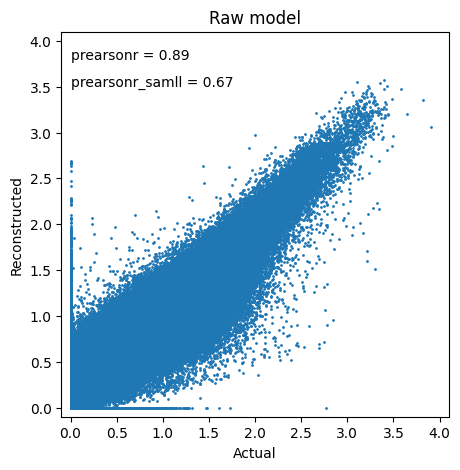

In [15]:
raw_data_flatten = np.array(data).flatten()
raw_out_flatten = out_raw.flatten()

plt.figure(figsize=(5,5))
plt.scatter(x=raw_data_flatten, y=raw_out_flatten, s=1)
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 4.1)
plt.xlabel('Actual')
plt.ylabel('Reconstructed')
plt.text(0, 3.8, 'prearsonr = 0.89')
plt.text(0, 3.5, 'prearsonr_samll = 0.67')
plt.title('Raw model')

In [16]:
stats.pearsonr(raw_data_flatten, raw_out_flatten)

PearsonRResult(statistic=np.float64(0.8880637020624054), pvalue=np.float64(0.0))

In [17]:
stats.pearsonr(
    raw_data_flatten[raw_data_flatten < np.percentile(raw_data_flatten, 50)], 
    raw_out_flatten[raw_data_flatten < np.percentile(raw_data_flatten, 50)]
)

PearsonRResult(statistic=np.float64(0.6716777194483368), pvalue=np.float64(0.0))

# shrinkage loss model compare

In [25]:
perf_skloss = pd.read_csv('result_LA_shrinkage_loss_test/dp1_0_dp2_0/performance_tmp.csv', index_col=0)
perf_skloss = perf_skloss[(perf_skloss['weight_decay'] == 1e-10) & (perf_skloss['network_type']=='cpd')]
perf_skloss.index = range(perf_skloss.shape[0])

report_skloss = perf_skloss[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
report_skloss.index = range(report_skloss.shape[0])

report_skloss['AUPRC'] = 0.0
report_skloss['R2'] = 0.0
for index, row in report_skloss.iterrows():
    tmp = perf_skloss.loc[(perf_skloss['weight_decay']==row['weight_decay'])&\
                      (perf_skloss['drop_p_prior']==row['drop_p_prior'])&\
                      (perf_skloss['drop_p_kki']==row['drop_p_kki'])&\
                      (perf_skloss['cv']==row['cv'])]
    # 在每个超参数组合下，每次交叉验证中，选取fit/refit（11个）模型R2最高时的AUPRC和R2作为这个超参数组合在这次交叉验证中的性能
    max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
    report_skloss.at[index, 'AUPRC'] = max_r2_row['AUPRC']
    report_skloss.at[index, 'R2'] = max_r2_row['val_r2']
# 计算所有交叉验证的平均值代表每个超参数组合的性能
report_skloss = report_skloss.groupby(['weight_decay', 'drop_p_prior', 'drop_p_kki'])[['AUPRC', 'R2']].mean().reset_index()

report_skloss

,weight_decay,drop_p_prior,drop_p_kki,AUPRC,R2
0,1.000000e-10,0,0,0.216131,0.889464


In [8]:
mod_model_skloss = torch.load('result_LA_shrinkage_loss_test/dp1_0_dp2_0/model/cv0_wd1e-10_refit9.pth')
mod_model_skloss.eval()

KinaseNet(
  (activation): ReLU0()
  (prior): Encoder(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=10287, out_features=186, bias=False)
  )
  (kki): LatentLayer(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=186, out_features=186, bias=False)
  )
  (ksr): Decoder(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=186, out_features=10287, bias=False)
  )
)

In [19]:
out_mod_skloss = mod_model_skloss(torch.tensor(np.array(data)).to(raw_model.prior.fc.weight.dtype)).detach().numpy()

Text(0.5, 1.0, 'shrinkage loss(a = 10, c = 0.2)')

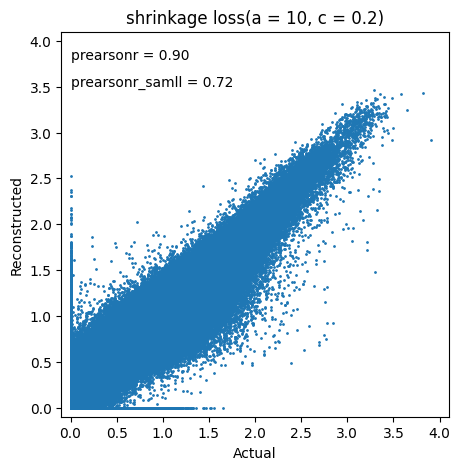

In [24]:
raw_data_flatten = np.array(data).flatten()
mod_out_skloss_flatten = out_mod_skloss.flatten()

plt.figure(figsize=(5,5))
plt.scatter(x=raw_data_flatten, y=mod_out_skloss_flatten, s=1)
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 4.1)
plt.xlabel('Actual')
plt.ylabel('Reconstructed')
plt.text(0, 3.8, 'prearsonr = 0.90')
plt.text(0, 3.5, 'prearsonr_samll = 0.72')
plt.title('shrinkage loss(a = 10, c = 0.2)')

In [21]:
stats.pearsonr(raw_data_flatten, mod_out_skloss_flatten)

PearsonRResult(statistic=np.float64(0.9088637279183565), pvalue=np.float64(0.0))

In [23]:
stats.pearsonr(
    raw_data_flatten[raw_data_flatten < np.percentile(raw_data_flatten, 50)], 
    mod_out_skloss_flatten[raw_data_flatten < np.percentile(raw_data_flatten, 50)]
)

PearsonRResult(statistic=np.float64(0.7253013034657296), pvalue=np.float64(0.0))

In [401]:
perf_alf2 = pd.read_csv('result_LA_percentile_50_alpha_2/dp1_0_dp2_0/performance_tmp.csv', index_col=0)
perf_alf2 = perf_alf2[(perf_alf2['weight_decay'] == 1e-10) & (perf_alf2['network_type']=='cpd')]
perf_alf2.index = range(perf_alf2.shape[0])

report_alf2 = perf_alf2[['weight_decay', 'drop_p_prior', 'drop_p_kki', 'cv']].drop_duplicates().copy()
report_alf2.index = range(report_alf2.shape[0])

report_alf2['AUPRC'] = 0.0
report_alf2['R2'] = 0.0
for index, row in report_alf2.iterrows():
    tmp = perf_alf2.loc[(perf_alf2['weight_decay']==row['weight_decay'])&\
                      (perf_alf2['drop_p_prior']==row['drop_p_prior'])&\
                      (perf_alf2['drop_p_kki']==row['drop_p_kki'])&\
                      (perf_alf2['cv']==row['cv'])]
    # 在每个超参数组合下，每次交叉验证中，选取fit/refit（11个）模型R2最高时的AUPRC和R2作为这个超参数组合在这次交叉验证中的性能
    max_r2_row = tmp.loc[tmp['val_r2'].idxmax()]
    report_alf2.at[index, 'AUPRC'] = max_r2_row['AUPRC']
    report_alf2.at[index, 'R2'] = max_r2_row['val_r2']

# 计算所有交叉验证的平均值代表每个超参数组合的性能
report_alf2 = report_alf2.groupby(['weight_decay', 'drop_p_prior', 'drop_p_kki'])[['AUPRC', 'R2']].mean().reset_index()

report_alf2

,weight_decay,drop_p_prior,drop_p_kki,AUPRC,R2
0,1.000000e-10,0,0,0.226938,0.861669


In [402]:
mod_model_alf2 = torch.load('result_LA_percentile_50_alpha_2/dp1_0_dp2_0/model/cv0_wd1e-10_refit9.pth')
mod_model_alf2.eval()

KinaseNet(
  (activation): ReLU0()
  (prior): Encoder(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=10287, out_features=186, bias=False)
  )
  (kki): LatentLayer(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=186, out_features=186, bias=False)
  )
  (ksr): Decoder(
    (dropout): Identity()
    (activation): ReLU0()
    (fc): Linear(in_features=186, out_features=10287, bias=False)
  )
)

In [403]:
out_mod_alf2 = mod_model_alf2(torch.tensor(np.array(data)).to(raw_model.prior.fc.weight.dtype)).detach().numpy()

Text(0.5, 1.0, 'alpha_samll = 2, percentile = 0.5')

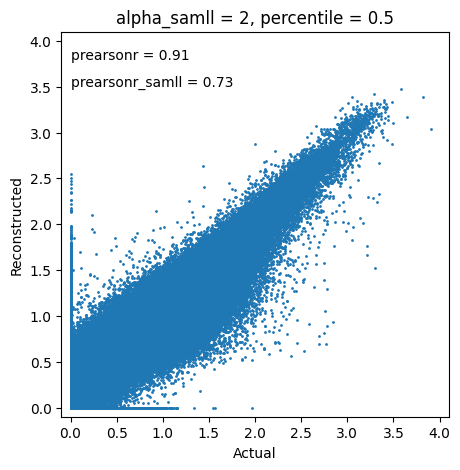

In [404]:
raw_data_flatten = np.array(data).flatten()
mod_out_alf2_flatten = out_mod_alf2.flatten()

plt.figure(figsize=(5,5))
plt.scatter(x=raw_data_flatten, y=mod_out_alf2_flatten, s=1)
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 4.1)
plt.xlabel('Actual')
plt.ylabel('Reconstructed')
plt.text(0, 3.8, 'prearsonr = 0.91')
plt.text(0, 3.5, 'prearsonr_samll = 0.73')
plt.title('alpha_samll = 2, percentile = 0.5')

In [405]:
stats.pearsonr(raw_data_flatten, mod_out_alf2_flatten)

(0.9118034523467369, 0.0)

In [406]:
stats.pearsonr(raw_data_flatten[raw_data_flatten < np.percentile(raw_data_flatten, 50)], 
               mod_out_alf2_flatten[[raw_data_flatten < np.percentile(raw_data_flatten, 50)]])

(0.7334926601311111, 0.0)